# S&P 500 Stocks: Multi-Year Performance & Risk Analysis

This notebook presents a comprehensive case study on the performance and risk profiles of S&P 500 companies over the past five years (2019-2024).  
The project demonstrates advanced data analysis skills using real-time web scraping, batch data acquisition, robust data cleaning, sector mapping, and insightful financial analytics.

**Key tools & libraries:** Python, Pandas, yfinance, matplotlib  
**Techniques:** Web scraping, batch processing, advanced data wrangling, risk/return analysis, sector-wise aggregation, actionable data visualization.

---

## **Objective**

- To analyze and compare the risk and return metrics of S&P 500 stocks using historical price data.
- To extract sector-level trends and identify top and bottom performers across the index.
- To present insights relevant for both data professionals and financial decision makers.

---
**This project was entirely conceptualized and developed based on my own curiosity and interest in applying data science to real-world financial markets.**


## 1. Data Acquisition & Preparation

### 1.1. Scraping the S&P 500 Companies List

We dynamically retrieve the latest list of S&P 500 companies directly from Wikipedia using Pandas' `read_html` function. This ensures our analysis is always up-to-date with the most current index composition.

In [2]:
!pip install yfinance



In [3]:
import pandas as pd

url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
sp500 = pd.read_html(url)[0]
symbols = sp500['Symbol'].tolist()
print(f"Toplam şirket sayısı: {len(symbols)}")
print(symbols[:10])  # To see the first 10 companies

Toplam şirket sayısı: 503
['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A']


**Insight:**
Automating data retrieval from Wikipedia guarantees that the S&P 500 stock list is always accurate and future-proof. This eliminates manual updates and supports reproducible analytics pipelines.



### 1.2. Downloading Historical Price Data (2019-2024)
To analyze the financial performance, we collect 5 years of daily closing prices for all S&P 500 stocks using the yfinance API. The download is performed in batches (50 symbols per request) to handle API rate limits and potential errors robustly.

In [4]:
import yfinance as yf
import time

all_symbols = symbols
group_size = 50  # Number of symbols per batch

price_data = pd.DataFrame()
failed_symbols = []

for i in range(0, len(all_symbols), group_size):
    group = all_symbols[i:i+group_size]
    try:
        data = yf.download(group, start='2019-06-18', end='2024-06-18')['Close']
        price_data = pd.concat([price_data, data], axis=1)
    except Exception as e:
        print(f"Error: {e}")
        failed_symbols.extend(group)
    time.sleep(2)  # Sleep to avoid API overloading

print("Total symbols retrieved:", price_data.shape[1])
print("Failed symbols:", failed_symbols)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_21376\3473058070.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(group, start='2019-06-18', end='2024-06-18')['Close']
[*********************100%***********************]  50 of 50 completed
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21376\3473058070.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(group, start='2019-06-18', end='2024-06-18')['Close']
[*********************100%***********************]  49 of 50 completed

2 Failed downloads:
['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2019-06-18 -> 2024-06-18)')
['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21376\3473058070.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(group, start='2019-06-18', end='2024-06-18')['Close']
[****

Total symbols retrieved: 503
Failed symbols: []


**Insight:**
Batch processing and exception handling are essential best practices for large-scale financial data extraction. This ensures minimal data loss and avoids API request failures or throttling.



### 1.3. Initial Data Exploration
Let’s take a quick look at the raw daily closing price data. This provides an overview of the dataset’s structure and helps identify potential data quality issues (e.g., missing values).

In [5]:
price_data.head()

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WST,WTW,WY,WYNN,XEL,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-06-18,68.899529,47.658001,60.174885,NaN,75.121300,34.023148,169.136124,276.779999,98.486778,34.647152,...,119.394547,173.356812,20.718292,116.008720,50.082806,75.563683,97.329498,109.458946,201.809998,108.221420
2019-06-19,69.608574,47.518707,59.682724,NaN,75.940773,34.327435,168.631897,291.209991,99.472214,34.235073,...,119.866837,174.849792,20.782097,116.313004,50.691330,75.880112,97.992035,110.617264,200.529999,109.080482
2019-06-20,70.250473,47.900555,60.244091,NaN,76.490089,34.631721,170.987885,302.109985,100.833839,34.731239,...,120.250534,176.591507,21.180832,116.436607,51.108124,77.527451,99.039551,110.932365,201.119995,107.830086
2019-06-21,70.269653,47.737251,60.582466,NaN,76.544106,34.650742,170.107849,299.329987,101.828209,34.546234,...,120.073433,176.785004,20.853867,115.533264,51.299870,76.094170,98.726189,109.616470,200.110001,107.744171
2019-06-24,70.078026,47.689228,60.328690,NaN,76.282928,34.403507,170.612045,299.869995,101.138428,34.251896,...,120.221016,176.729706,20.598673,116.027740,51.074791,76.410599,99.075371,108.810249,200.039993,108.307320


## 2.Data Cleaning & Quality Assurance
### 2.1. Filtering Out Sparse Data
To ensure robust analysis, I removed stocks with excessive missing data. Specifically, I kept only those with at least 50% non-missing values throughout the time period.

In [6]:
min_valid_ratio = 0.5
valid_counts = price_data.notna().sum() / len(price_data)
filtered_price_data = price_data.loc[:, valid_counts > min_valid_ratio]
print("Number of stocks retained:", filtered_price_data.shape[1])

Number of stocks retained: 494


### 2.2. Inspecting Cleaned Data

In [7]:
filtered_price_data.head()

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WST,WTW,WY,WYNN,XEL,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-06-18,68.899529,47.658001,60.174885,NaN,75.121300,34.023148,169.136124,276.779999,98.486778,34.647152,...,119.394547,173.356812,20.718292,116.008720,50.082806,75.563683,97.329498,109.458946,201.809998,108.221420
2019-06-19,69.608574,47.518707,59.682724,NaN,75.940773,34.327435,168.631897,291.209991,99.472214,34.235073,...,119.866837,174.849792,20.782097,116.313004,50.691330,75.880112,97.992035,110.617264,200.529999,109.080482
2019-06-20,70.250473,47.900555,60.244091,NaN,76.490089,34.631721,170.987885,302.109985,100.833839,34.731239,...,120.250534,176.591507,21.180832,116.436607,51.108124,77.527451,99.039551,110.932365,201.119995,107.830086
2019-06-21,70.269653,47.737251,60.582466,NaN,76.544106,34.650742,170.107849,299.329987,101.828209,34.546234,...,120.073433,176.785004,20.853867,115.533264,51.299870,76.094170,98.726189,109.616470,200.110001,107.744171
2019-06-24,70.078026,47.689228,60.328690,NaN,76.282928,34.403507,170.612045,299.869995,101.138428,34.251896,...,120.221016,176.729706,20.598673,116.027740,51.074791,76.410599,99.075371,108.810249,200.039993,108.307320


## 3. Return Calculation & Time-Series Transformation
### 3.1. Calculating Daily Returns
Here, I calculated the daily returns for each stock, which is the percentage change in closing prices from one day to the next. This normalizes price movements across all symbols and is a foundational step for further financial analysis.

In [48]:
returns = filtered_price_data.pct_change().dropna()
returns.head()

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WST,WTW,WY,WYNN,XEL,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2021-04-15,0.009927,0.018708,0.009348,-0.006121,0.020082,0.004986,0.002496,0.024715,0.014199,0.002050,...,0.036293,0.005323,0.012888,-0.008756,0.018637,0.002226,-0.004655,0.020498,0.014381,0.014533
2021-04-16,0.009753,-0.002528,0.009542,0.019048,0.003308,-0.005706,0.006348,0.003497,-0.007467,0.013295,...,0.009262,0.010169,0.021034,-0.005003,0.005861,0.005276,0.003826,0.000699,0.011106,0.013176
2021-04-19,-0.008025,0.005068,0.006487,-0.023001,0.001448,-0.009481,-0.001463,-0.016969,-0.016300,-0.002691,...,0.009432,-0.009942,-0.011191,-0.007857,0.001705,-0.003683,-0.002965,0.003782,-0.007517,0.002804
2021-04-20,-0.007790,-0.012830,0.003867,-0.028697,-0.036377,-0.011587,0.007189,-0.003797,-0.015550,-0.009782,...,0.008117,-0.003277,-0.012860,-0.036744,0.015037,-0.005730,0.002124,0.007419,-0.019759,0.005302
2021-04-21,0.010343,0.002930,0.016234,-0.014743,0.021667,0.016565,0.007346,-0.003637,0.024729,0.019077,...,0.014537,-0.006281,-0.004690,0.035761,-0.003215,0.017567,-0.004323,0.016340,-0.016394,0.008356


## 3 Company-Level Performance Analysis

### 3.1. Ranking Stocks by Annualized Return

We rank all stocks by their annualized return to identify the best and worst performers within the S&P 500.


In [49]:
risk_free_rate = 0.04  # Risk-free rate (based on U.S values)
trading_days = 252     # Number of trading days in a year

annual_return = returns.mean() * trading_days * 100
annual_volatility = returns.std() * (trading_days ** 0.5) * 100
sharpe_ratio = (annual_return / 100 - risk_free_rate) / (annual_volatility / 100)

performance_df = pd.DataFrame({
    'Annual Return (%)': annual_return,
    'Annual Volatility (%)': annual_volatility,
    'Sharpe Ratio': sharpe_ratio
})

performance_df = performance_df.sort_values('Sharpe Ratio', ascending=False)
performance_df.head(10)  # Top 10 companies with the highest risk/reward ratio

,Annual Return (%),Annual Volatility (%),Sharpe Ratio
Ticker,,,
LLY,54.815313,28.053925,1.811344
MCK,38.945103,21.184964,1.649524
SMCI,124.807934,74.065853,1.631088
VST,57.905411,34.462928,1.564156
NVDA,81.835725,53.229497,1.462267
TRGP,48.639363,32.538293,1.371902
AVGO,50.632894,33.993394,1.371822
MPC,44.479588,32.065168,1.262416
ANET,55.076768,41.936643,1.217951


### 3.2 List the Best & Worst Performing Companies

In [50]:
print("Top 10 Companies with the Highest Sharpe Ratio:")
print(performance_df.head(10))

print("\nBottom 10 Companies with the Lowest Sharpe Ratio:")
print(performance_df.tail(10))

Top 10 Companies with the Highest Sharpe Ratio:
        Annual Return (%)  Annual Volatility (%)  Sharpe Ratio
Ticker                                                        
LLY             54.815313              28.053925      1.811344
MCK             38.945103              21.184964      1.649524
SMCI           124.807934              74.065853      1.631088
VST             57.905411              34.462928      1.564156
NVDA            81.835725              53.229497      1.462267
TRGP            48.639363              32.538293      1.371902
AVGO            50.632894              33.993394      1.371822
MPC             44.479588              32.065168      1.262416
ANET            55.076768              41.936643      1.217951
COST            31.726849              23.588225      1.175453

Bottom 10 Companies with the Lowest Sharpe Ratio:
        Annual Return (%)  Annual Volatility (%)  Sharpe Ratio
Ticker                                                        
BMY             -8.

**Insight:**
Highlighting the top and bottom performers provides investors with clear signals on which stocks have delivered the highest and lowest risk-adjusted returns over the analysis period.

## 4. Distribution Analysis: Sharpe Ratio, Annual Return, and Volatility

We visualize the distributions of Sharpe ratios, annualized returns, and annualized volatility across all S&P 500 companies to understand the risk/reward landscape in greater depth.


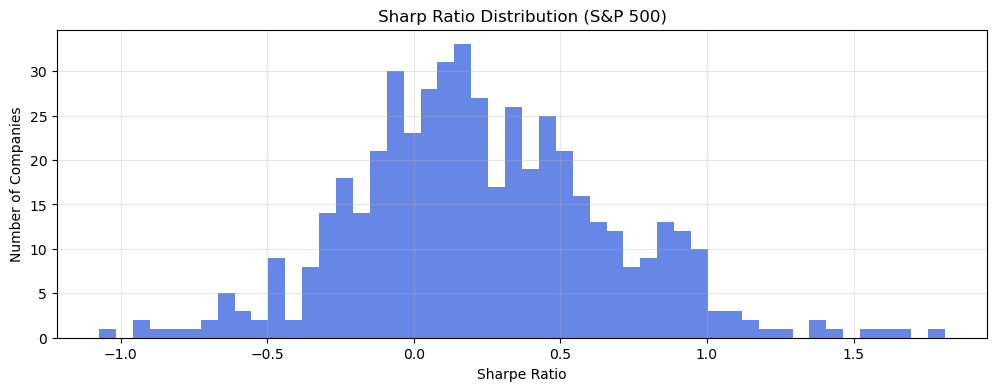

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.hist(performance_df['Sharpe Ratio'], bins=50, color='royalblue', alpha=0.8)
plt.title('Sharp Ratio Distribution (S&P 500)')
plt.xlabel('Sharpe Ratio')
plt.ylabel('Number of Companies')
plt.grid(True, alpha=0.3)
plt.show()

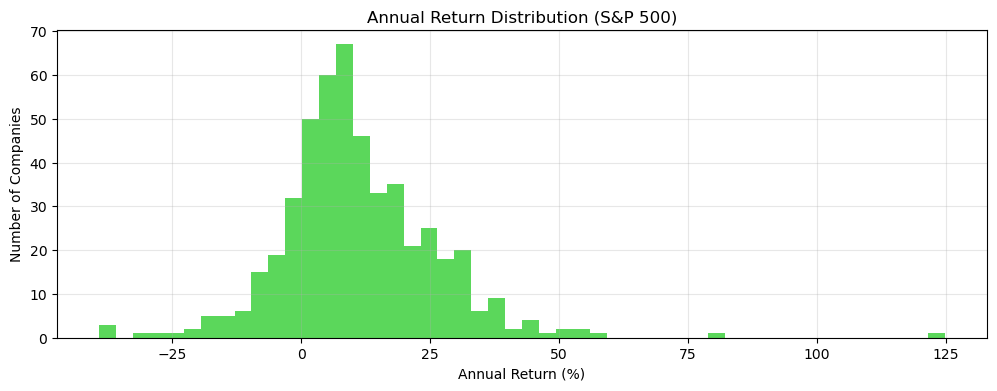

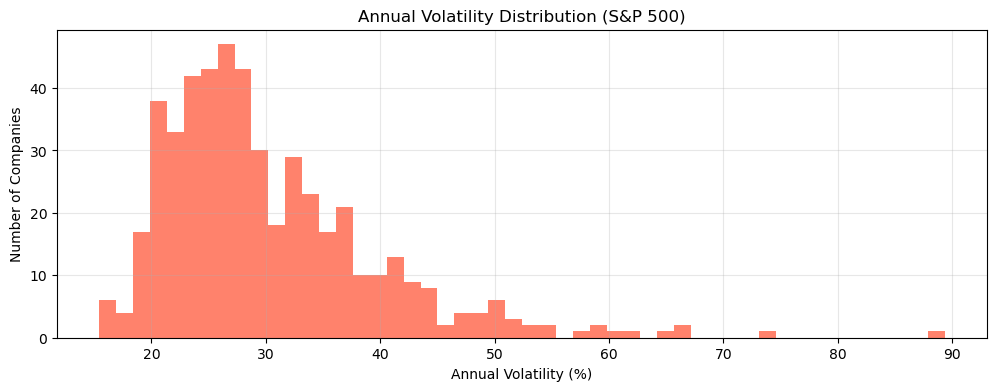

In [52]:
plt.figure(figsize=(12,4))
plt.hist(performance_df['Annual Return (%)'], bins=50, color='limegreen', alpha=0.8)
plt.title('Annual Return Distribution (S&P 500)')
plt.xlabel('Annual Return (%)')
plt.ylabel('Number of Companies')
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(12,4))
plt.hist(performance_df['Annual Volatility (%)'], bins=50, color='tomato', alpha=0.8)
plt.title('Annual Volatility Distribution (S&P 500)')
plt.xlabel('Annual Volatility (%)')
plt.ylabel('Number of Companies')
plt.grid(True, alpha=0.3)
plt.show()

## Analytical Insights from Distributions

**Sharpe Ratio Distribution:**  
- The majority of Sharpe ratios are concentrated between 0 and 0.5 (central tendency).
- Many companies have negative Sharpe ratios, signaling either persistent losses or highly unfavorable risk/reward balances.
- There are a handful of positive outliers (Sharpe > 1.0), representing stocks that delivered exceptional returns for the risk taken.

**Annual Return Distribution:**  
- Most annualized returns cluster between 0% and 20%.
- There is a non-trivial number of companies with negative returns, showing that index averages can be deceptive.
- Outliers with 50%+ annual returns stand out (notably, stocks like SMCI).

**Annual Volatility Distribution:**  
- The most frequent range for volatility is 20% to 35%.
- A small group of companies have extremely high volatility (60%-90%), likely due to sectoral or firm-specific factors.

*These insights are crucial for understanding the spread and asymmetry in S&P 500 risk/return metrics—reminding investors that the index average hides substantial variance!*


## 5.Top & Bottom 10 Companies by Sharpe Ratio

The following bar charts highlight the best and worst stocks in terms of risk-adjusted performance (Sharpe Ratio):

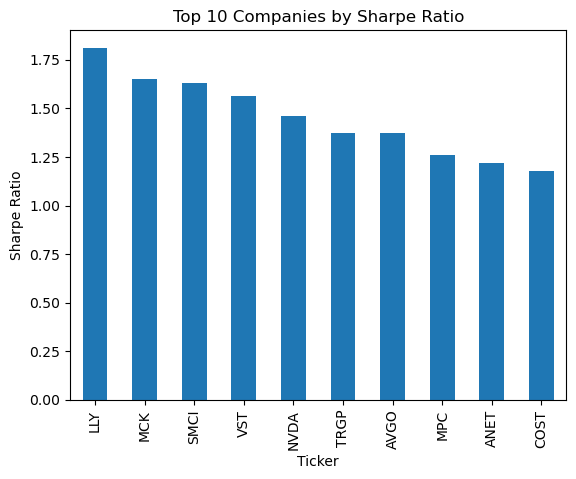

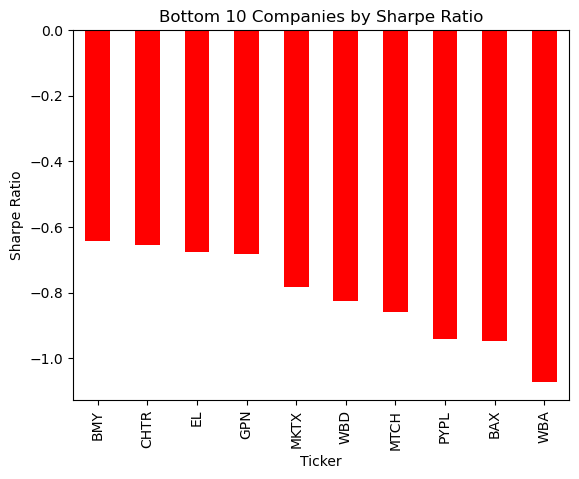

In [53]:
top10 = performance_df.head(10)
bottom10 = performance_df.tail(10)

top10.plot(kind='bar', y='Sharpe Ratio', legend=False, title='Top 10 Companies by Sharpe Ratio')
plt.ylabel('Sharpe Ratio')
plt.show()

bottom10.plot(kind='bar', y='Sharpe Ratio', color='red', legend=False, title='Bottom 10 Companies by Sharpe Ratio')
plt.ylabel('Sharpe Ratio')
plt.show()

## 6. Sector-Level Analysis & Visualization
### 6.1 Adding Sector Information for Each Company

Since sector information is not always directly available from financial APIs, I imported up-to-date sector mappings for S&P 500 companies from an external CSV file. This step ensures data reliability and allows for robust sector-level analysis.

**Note:**  
The CSV file (`sp500.csv`) was sourced from [datahub.io](https://datahub.io/core/s-and-p-500-companies), a reputable open-data portal that provides regularly updated S&P 500 constituent and sector data.

In [54]:
sp500_info = pd.read_csv('sp500.csv')
performance_df = performance_df.merge(sp500_info[['Symbol','GICS Sector']], left_index=True, right_on='Symbol', how='left')

### 6.2 Sector-Level Average Return, Volatility, and Sharpe Ratio
The following code calculates the average metrics for each sector:

In [55]:
sector_stats = performance_df.groupby('GICS Sector').agg({
    'Annual Return (%)': 'mean',
    'Annual Volatility (%)': 'mean',
    'Sharpe Ratio': 'mean'
}).sort_values('Sharpe Ratio', ascending=False)

print(sector_stats)

                        Annual Return (%)  Annual Volatility (%)  Sharpe Ratio
GICS Sector                                                                   
Energy                          29.919194              35.978172      0.732849
Information Technology          19.571943              36.248665      0.391134
Industrials                     12.317433              28.100045      0.323112
Financials                       9.754335              29.246502      0.237827
Consumer Discretionary          10.000544              35.810123      0.202760
Materials                        9.700329              30.866222      0.180840
Health Care                      8.238468              28.576115      0.169062
Utilities                        7.528337              22.374720      0.126977
Real Estate                      5.321599              26.571125      0.052104
Consumer Staples                 3.965335              23.485445      0.042183
Communication Services           1.320855           

### 6.3 Visualize Average Sharpe Ratio by Sector as a Bar Chart

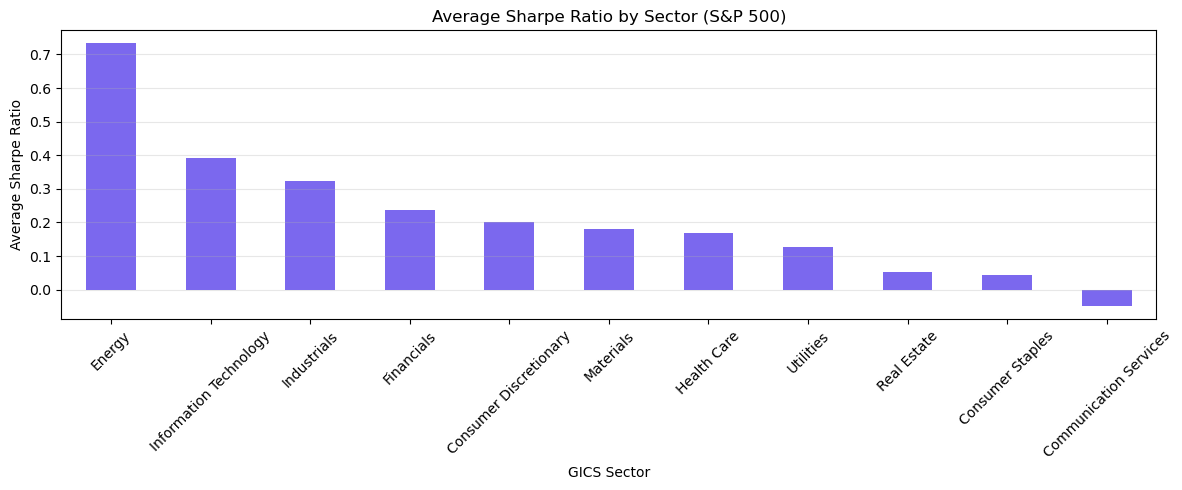

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
sector_stats['Sharpe Ratio'].plot(kind='bar', color='mediumslateblue')
plt.title('Average Sharpe Ratio by Sector (S&P 500)')
plt.ylabel('Average Sharpe Ratio')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 6.4 Visualize Average Return and Volatility by Sector with Bar Charts

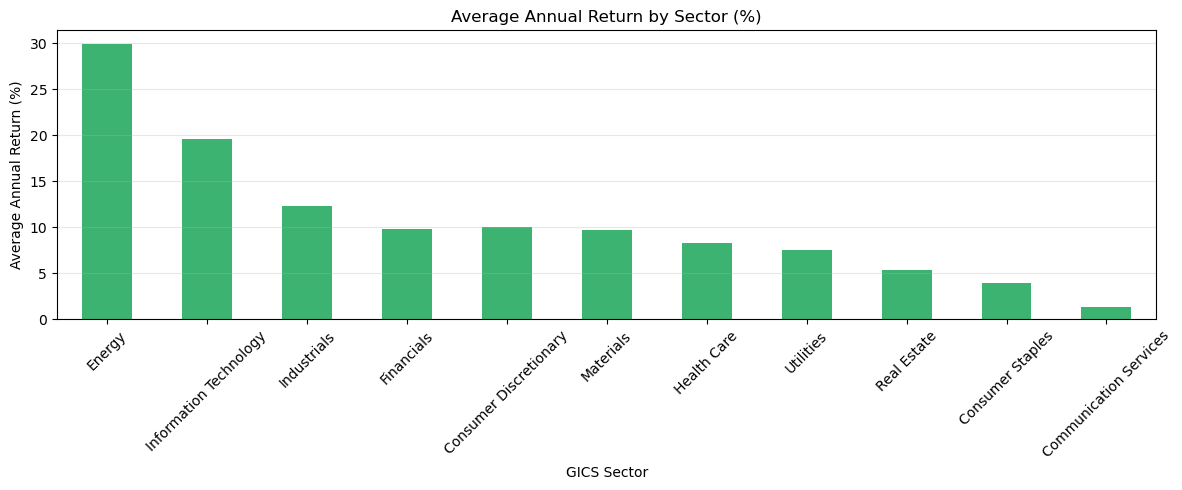

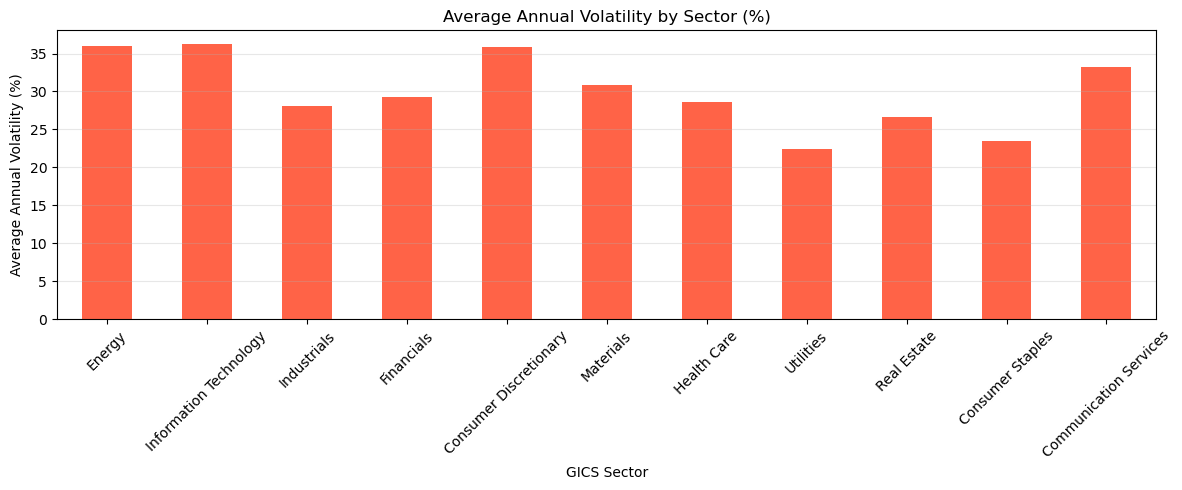

In [60]:
plt.figure(figsize=(12, 5))
sector_stats['Annual Return (%)'].plot(kind='bar', color='mediumseagreen')
plt.title('Average Annual Return by Sector (%)')
plt.ylabel('Average Annual Return (%)')
plt.xlabel('GICS Sector')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
sector_stats['Annual Volatility (%)'].plot(kind='bar', color='tomato')
plt.title('Average Annual Volatility by Sector (%)')
plt.ylabel('Average Annual Volatility (%)')
plt.xlabel('GICS Sector')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


## Sectoral Performance Analysis – S&P 500 (2019-2024)

### 1. Sharpe Ratio Analysis
- **Energy** stands out with the highest average Sharpe Ratio (> 0.7), indicating both high return and relatively moderate risk.
- **Information Technology** and **Industrials** are also above average, offering solid risk-adjusted returns.
- **Communication Services** and **Consumer Staples** are well below the average; Communication Services, in fact, has a negative Sharpe Ratio, reflecting persistent losses or extreme risk/reward imbalance.
- Defensive sectors (e.g., Utilities, Real Estate) have low Sharpe Ratios but may provide portfolio stability.

### 2. Return & Volatility Analysis
- **Annual Return (Green Bar):** Energy and IT are leaders in yearly performance, with Industrials and Financials also delivering solid results. Communication Services and Consumer Staples hover near zero.
- **Volatility (Red Bar):** Energy and IT exhibit high volatility—high risk, high reward. Utilities and Consumer Staples offer low volatility (lower risk, lower return). Communication Services and Consumer Discretionary display high volatility but poor return—a bad risk/reward tradeoff.

### 3. Portfolio Insights
- **Energy** has provided a rare risk/reward profile in recent years, likely driven by commodity price shocks and supply disruptions.
- **Tech stocks**, despite volatility, delivered impressive returns relative to risk, marking them as portfolio essentials.
- **Defensive sectors** (Consumer Staples, Utilities) can buffer overall volatility, but offer limited upside.
- **Communication Services** is a warning for investors: high risk, poor return.
- These sectoral perspectives help guide both sector rotation strategies and risk-controlled portfolio construction.

*For professional presentations, summarize these visual takeaways in a “Key Results & Strategy” section. Optionally, supplement with additional analysis (e.g., sector best/worst stocks, correlations, S&P 500 index vs. sector performance).*


##  Best/Worst Performing Companies by Sector Analysis
Purpose: To identify the best and worst performing companies in each sector based on Sharpe Ratio.

In [62]:
top_n = 3  # How many companies per sector to display

grouped = performance_df.groupby('GICS Sector')

best_per_sector = grouped.apply(lambda x: x.nlargest(top_n, 'Sharpe Ratio')[['Symbol', 'Sharpe Ratio', 'Annual Return (%)', 'Annual Volatility (%)']])
worst_per_sector = grouped.apply(lambda x: x.nsmallest(top_n, 'Sharpe Ratio')[['Symbol', 'Sharpe Ratio', 'Annual Return (%)', 'Annual Volatility (%)']])

# Reset index for a nice tabular view
best_per_sector = best_per_sector.reset_index(level=0, drop=True)
worst_per_sector = worst_per_sector.reset_index(level=0, drop=True)

print("--- TOP PERFORMERS ---")
display(best_per_sector)

print("--- WORST PERFORMERS ---")
display(worst_per_sector)

--- TOP PERFORMERS ---


C:\Users\ASUS\AppData\Local\Temp\ipykernel_21376\386001783.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best_per_sector = grouped.apply(lambda x: x.nlargest(top_n, 'Sharpe Ratio')[['Symbol', 'Sharpe Ratio', 'Annual Return (%)', 'Annual Volatility (%)']])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21376\386001783.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  worst_per_sector = grouped.apply(lamb

,Symbol,Sharpe Ratio,Annual Return (%),Annual Volatility (%)
446,TKO,0.680974,26.532118,33.088097
311,META,0.500202,27.799034,47.578881
20,GOOG,0.494628,19.467849,31.271667
139,DECK,0.967394,42.932180,40.244387
350,ORLY,0.906802,24.753133,22.886074
51,AZO,0.878701,25.183299,24.107521
128,COST,1.175453,31.726849,23.588225
481,WMT,0.570626,15.291267,19.787515
279,KR,0.433095,15.864936,27.395665
435,TRGP,1.371902,48.639363,32.538293


--- WORST PERFORMERS ---


,Symbol,Sharpe Ratio,Annual Return (%),Annual Volatility (%)
305,MTCH,-0.858943,-37.306607,48.090020
483,WBD,-0.825099,-39.134521,52.278022
98,CHTR,-0.655835,-18.334035,34.054332
41,APTV,-0.452814,-14.015155,39.784874
320,MHK,-0.387789,-10.989562,38.653938
80,CZR,-0.364831,-15.573695,53.651353
480,WBA,-1.073566,-30.001860,31.671892
177,EL,-0.674828,-21.923577,38.415092
234,HRL,-0.528960,-8.054084,22.788270
442,TPL,0.401023,21.812538,44.417722


## 7.Sector Correlation Matrix

To further support portfolio construction and diversification, I analyzed the correlation between sector-average daily returns across the S&P 500.

### Purpose & Applications

- **Portfolio Diversification:**  
  Low correlations between sectors (e.g., Energy vs. Health Care) allow investors to reduce portfolio risk through effective diversification.
- **Macro Shock Sensitivity:**  
  Identifying which sectors move together during crises or market shocks (e.g., Financials & Industrials) versus defensive/independent sectors (e.g., Consumer Staples, Health Care).
- **Strategic Asset Allocation:**  
  Understanding which sectors “travel together” (high correlation) or “move independently” (low correlation) helps shape both hedging and sector-rotation strategies.
- **Clustering & Thematic Investing:**  
  Highly correlated sector groups can be identified for thematic or factor-based investment.

---

### Calculation

I first compute the average daily return for each sector, then calculate the correlation matrix and visualize it as a heatmap.


### 7.1 Mapping Symbols to Sectors

Since daily price data and sector data comes from different sources, I first merge these datasets and create a mapping dictionary.

In [65]:
import pandas as pd

# Read sector info from our up-to-date external CSV (datahub.io)
sp500_info = pd.read_csv('sp500.csv')  # Should contain columns 'Symbol', 'GICS Sector'

# Create mapping: symbol -> sector
symbol_to_sector = dict(zip(sp500_info['Symbol'], sp500_info['GICS Sector']))

### 7.2 Calculating Sector-Average Daily Returns

For each day, we want the average return of all stocks within each sector. This requires grouping the daily return columns by their corresponding sector.

In [66]:
sector_returns = {}  # Dict: sector -> list of stock daily returns

for symbol in returns.columns:
    sector = symbol_to_sector.get(symbol)
    if sector is not None:
        if sector not in sector_returns:
            sector_returns[sector] = []
        sector_returns[sector].append(returns[symbol])

# Build a DataFrame: columns are sectors, values are mean daily returns for that sector
sector_return_df = pd.DataFrame({
    sector: pd.concat(symbol_returns, axis=1).mean(axis=1)
    for sector, symbol_returns in sector_returns.items()
})

# Check result
sector_return_df.head()

,Health Care,Information Technology,Consumer Discretionary,Financials,Consumer Staples,Utilities,Materials,Industrials,Real Estate,Energy,Communication Services
Date,,,,,,,,,,,
2021-04-15,0.017450,0.013637,0.002247,0.003089,0.009046,0.011098,0.009839,0.006098,0.017192,-0.008251,0.007804
2021-04-16,0.008673,0.000921,0.008518,0.004211,0.007634,0.005981,0.010517,0.004463,0.002595,-0.009522,0.001050
2021-04-19,-0.002995,-0.012896,-0.009436,-0.003081,-0.002510,-0.004240,-0.003064,-0.005161,0.002844,-0.001001,-0.003493
2021-04-20,0.000743,-0.009111,-0.019556,-0.013914,0.003663,0.012717,-0.011517,-0.010097,0.009673,-0.029982,-0.008084
2021-04-21,0.014363,0.015688,0.015791,0.012739,0.007199,-0.005127,0.019560,0.012855,0.007470,0.011716,0.013074


**Explanation:**

We loop over each symbol, assign its sector, and aggregate all columns (symbols) per sector.

Final DataFrame: rows = dates, columns = sectors, values = average sector return per day.

### 7.3 Correlation Matrix of Sector Returns

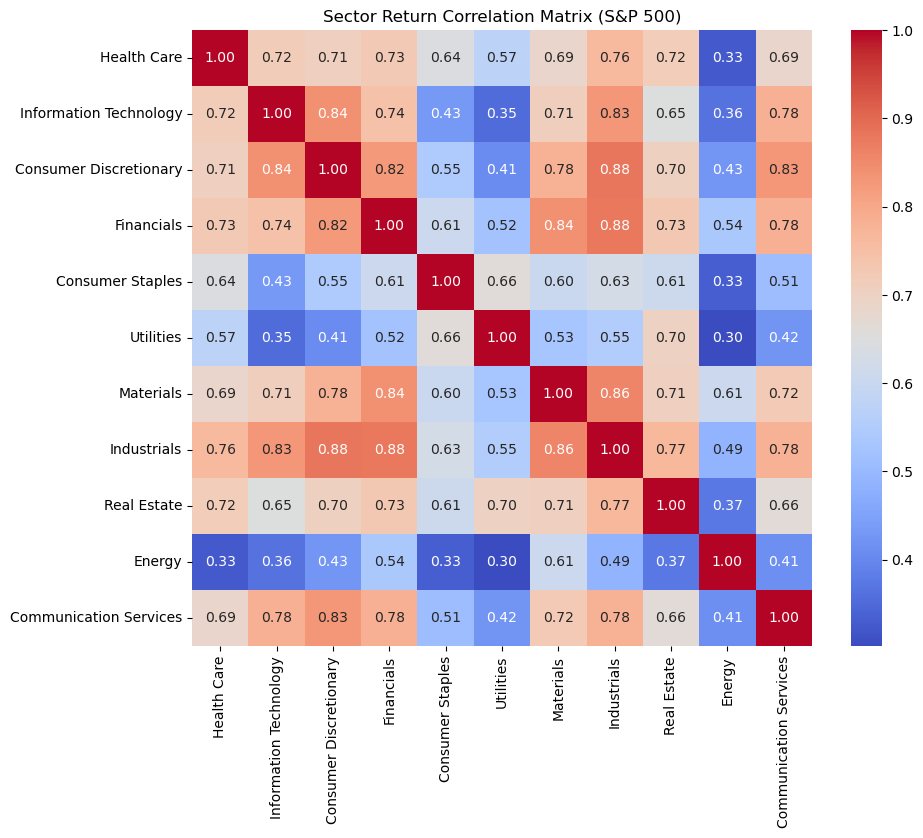

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

sector_corr = sector_return_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(sector_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Sector Return Correlation Matrix (S&P 500)")
plt.show()

#### Professional Analytical Insight
Why is mapping needed?
Data sources rarely align perfectly; sector info and price data almost always come from separate files/APIs. Creating a clean symbol-to-sector mapping is a must for robust analysis.

Why groupby for daily returns?
By averaging all stocks’ daily returns within each sector, we get the true “sector pulse” for correlation, risk, and thematic analysis.

Practical Result:
The correlation heatmap shows which sectors tend to move together (high correlation) and which provide genuine diversification (low correlation).

## 7.4 Sector vs. Index Benchmarking (Alpha Analysis)

**What is Sector Analysis?**  
Sector analysis examines the growth potential, profitability, and risk profiles of different industries within an index or the economy as a whole (e.g., Technology, Energy, Finance, Health Care).

**Key Objectives:**  
- Understand which sectors are most attractive and stable (e.g., is Technology more resilient than Energy?)
- Diversify portfolios by spreading exposure across multiple sectors
- Optimize risk/return ratios by analyzing inter-sector correlations

**Why do we compare with the index?**  
- To determine which sectors outperform (positive alpha) or underperform (negative alpha) the market as a whole
- To assess the effectiveness of sector allocation in a portfolio relative to passive index investment (benchmarking)

---

### Calculating Sector Alpha vs. S&P 500

We calculate each sector’s “alpha” as the difference between its average annual return and the average return of the S&P 500 as a whole.


In [70]:
# Calculate S&P 500 annual average return (as portfolio/ETF proxy)
sp500_annual_return = performance_df['Annual Return (%)'].mean()

# Calculate sector alpha (sector return minus index return)
sector_alpha = sector_stats['Annual Return (%)'] - sp500_annual_return
sector_stats['Alpha vs S&P500'] = sector_alpha

print(sector_stats[['Annual Return (%)', 'Alpha vs S&P500']])

                        Annual Return (%)  Alpha vs S&P500
GICS Sector                                               
Energy                          29.919194        18.843565
Information Technology          19.571943         8.496313
Industrials                     12.317433         1.241803
Financials                       9.754335        -1.321295
Consumer Discretionary          10.000544        -1.075086
Materials                        9.700329        -1.375300
Health Care                      8.238468        -2.837161
Utilities                        7.528337        -3.547292
Real Estate                      5.321599        -5.754030
Consumer Staples                 3.965335        -7.110295
Communication Services           1.320855        -9.754774


#### Interpreting Alpha
Positive Alpha: The sector outperformed the S&P 500 average (delivered superior returns for similar risk).

Negative Alpha: The sector lagged behind the index (underperformance).

Example Findings (based on your table):
Energy: Delivered an average annual return of 29.9%, which is +18.8% above the S&P 500 average. This is the top-performing sector, with a significant excess return.

Information Technology: With a 19.6% annual return, outperformed the index by 8.5%. Shows both strong growth and leadership.

Communication Services: One of the weakest performers, with a 1.3% annual return, 9.8% below the index.

#### General Insights for Investors
Positive Alpha sectors have consistently beaten the market—these are potential overweights for growth-oriented portfolios.

Negative Alpha sectors have underperformed—may be candidates for underweighting or require additional diversification/hedging.

## 8.Risk & Return Metrics
### 8.1. Annualized Return and Volatility
I computed two fundamental metrics for each stock:

Annualized Average Return: Average daily return scaled to a yearly value (assuming 252 trading days per year).

Annualized Volatility: Standard deviation of daily returns, also scaled annually.

In [57]:
trading_days = 252
annual_returns = returns.mean() * trading_days
annual_volatility = returns.std() * (trading_days ** 0.5)
risk_return_df = pd.DataFrame({
    'Annual Return': annual_returns,
    'Annual Volatility': annual_volatility
})
risk_return_df.head()

,Annual Return,Annual Volatility
Ticker,,
A,0.046308,0.284967
AAPL,0.198383,0.269660
ABBV,0.207034,0.201881
ABNB,0.063078,0.480360
ABT,-0.009429,0.220208


### 8.2. Scatter Plot of Return vs. Risk
We visualize the distribution of S&P 500 stocks based on their annualized return and volatility.

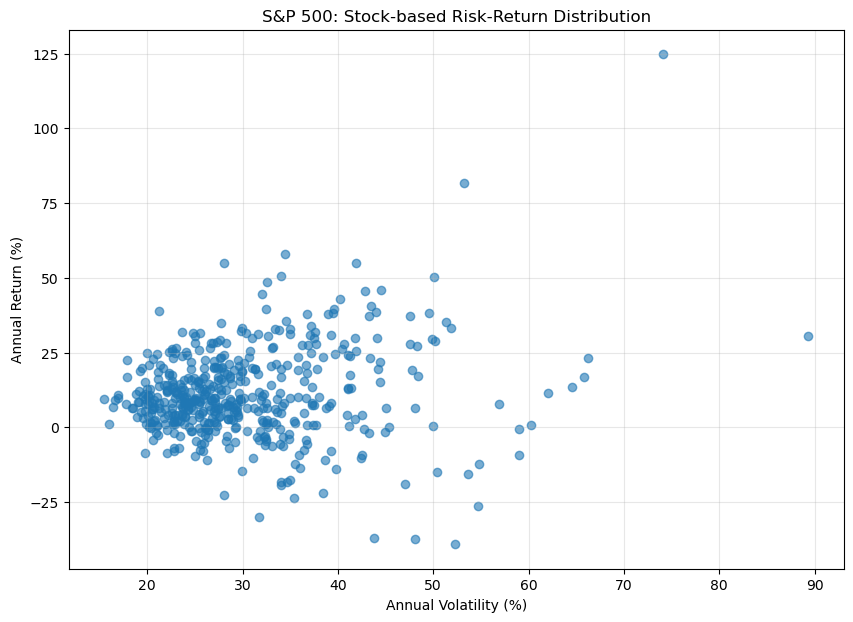

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(performance_df['Annual Volatility (%)'], performance_df['Annual Return (%)'], alpha=0.6)
plt.xlabel('Annual Volatility (%)')
plt.ylabel('Annual Return (%)')
plt.title('S&P 500: Stock-based Risk-Return Distribution')
plt.grid(alpha=0.3)
plt.show()

### 8.3 Visual Interpretation: S&P 500 Risk-Return Distribution

The scatter plot below visualizes the annualized volatility (risk) versus annualized return for each S&P 500 stock.

**1. Concentration & Typical Range**
- The majority of stocks cluster within 20–40% annual volatility and -10% to +30% annual return.
- Most S&P 500 companies deliver small or modest positive returns, but with moderate risk.

**2. Outliers**
- *Top right*: High-risk, high-return potential—typically fast-growing technology or speculative stocks (e.g., NVDA, SMCI).
- *Bottom left*: High risk and low/negative return—stocks to generally avoid.
- *Isolated upper points*: Exceptional outliers that delivered extraordinary gains over five years.

**3. Ideal Zone**
- *Top left corner*: Low risk, high return—this is the “holy grail” region for stock selection. Very few stocks are found here, highlighting the rarity of “high return, low risk” opportunities.

**4. General Pattern**
- There is a positive, but loose, risk-return relationship. As risk increases, so does potential return, but with considerable variance.
- This confirms the classic “risk-return trade-off”: higher risk can sometimes bring higher rewards, but not always.

**Portfolio Takeaways**
- Ideally, investors seek stocks in the top left (low risk, high return).
- Top right stocks may be suited for aggressive investors willing to tolerate volatility for big upside.
- Bottom zones generally represent poor performers, potential candidates for exclusion from portfolios.

*This risk-return map underscores the challenge of finding stocks that combine low risk with high return—and why diversification and disciplined selection are vital in portfolio management.*


## 9. Visualizing the Top & Bottom 5 Stocks on a Scatter Plot
The following code highlights the best and worst 5 stocks (by Sharpe Ratio) on a risk-return scatter plot, labeling each point:

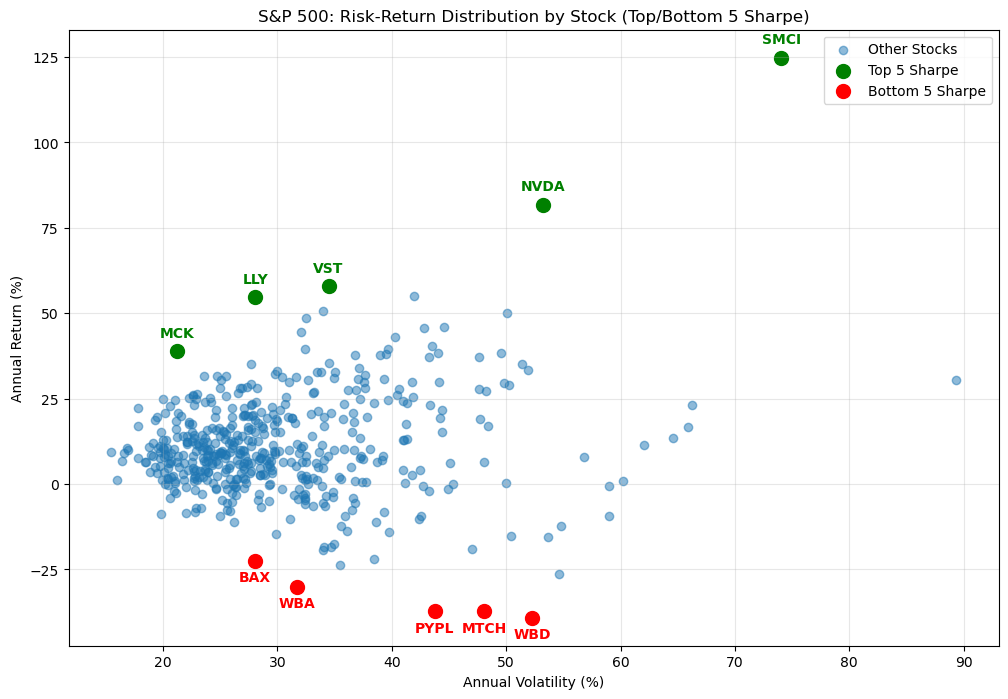

In [72]:
import matplotlib.pyplot as plt

# Find the top 5 and bottom 5 stocks by Sharpe Ratio
best_5 = performance_df.nlargest(5, 'Sharpe Ratio')
worst_5 = performance_df.nsmallest(5, 'Sharpe Ratio')

plt.figure(figsize=(12, 8))
plt.scatter(performance_df['Annual Volatility (%)'], performance_df['Annual Return (%)'], alpha=0.5, label='Other Stocks')

# Highlight top 5
plt.scatter(best_5['Annual Volatility (%)'], best_5['Annual Return (%)'], color='green', label='Top 5 Sharpe', s=100)
for i, row in best_5.iterrows():
    plt.annotate(row['Symbol'], (row['Annual Volatility (%)'], row['Annual Return (%)']),
                 textcoords="offset points", xytext=(0,10), ha='center', color='green', fontsize=10, fontweight='bold')

# Highlight bottom 5
plt.scatter(worst_5['Annual Volatility (%)'], worst_5['Annual Return (%)'], color='red', label='Bottom 5 Sharpe', s=100)
for i, row in worst_5.iterrows():
    plt.annotate(row['Symbol'], (row['Annual Volatility (%)'], row['Annual Return (%)']),
                 textcoords="offset points", xytext=(0,-15), ha='center', color='red', fontsize=10, fontweight='bold')

plt.xlabel('Annual Volatility (%)')
plt.ylabel('Annual Return (%)')
plt.title('S&P 500: Risk-Return Distribution by Stock (Top/Bottom 5 Sharpe)')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

## 10. Colored Scatter Plot by Sector
Add sector information as a color to the scatter plot for a more professional visualization using Seaborn.

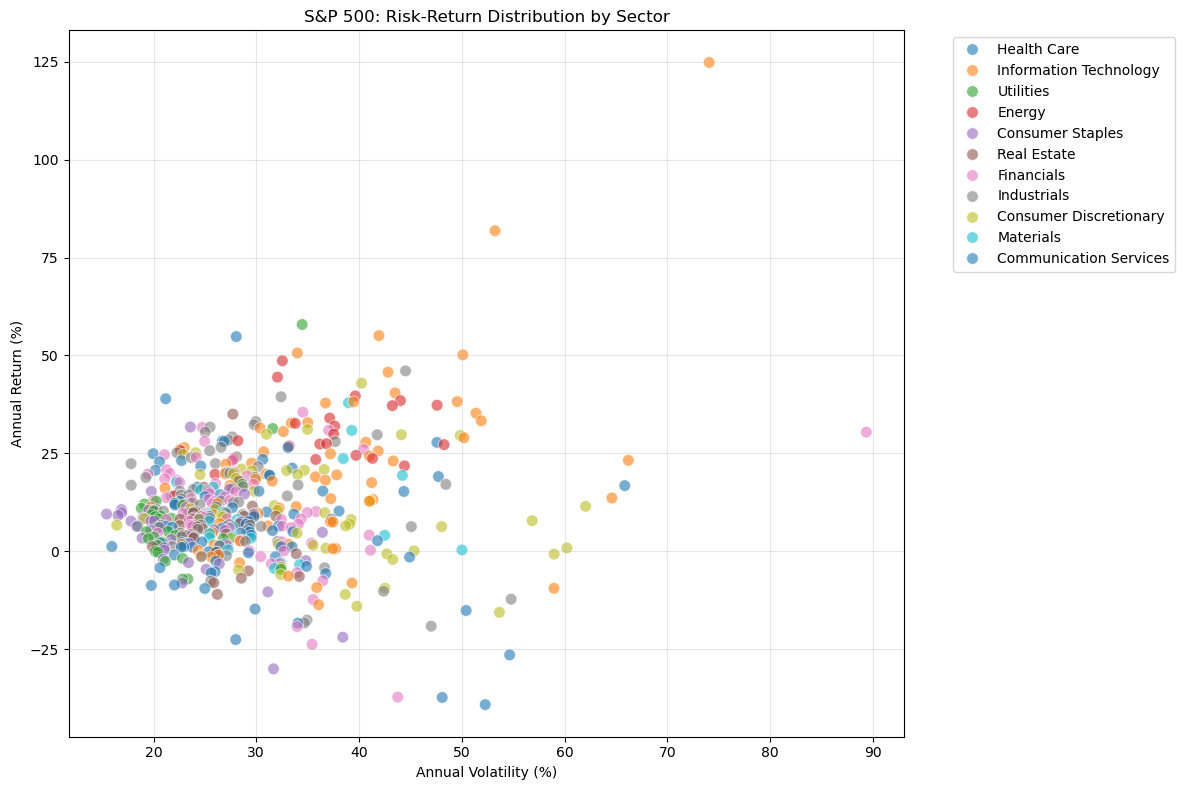

In [74]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=performance_df,
    x='Annual Volatility (%)',
    y='Annual Return (%)',
    hue='GICS Sector',
    palette='tab10',
    alpha=0.6,
    edgecolor='w',
    s=70
)
plt.title('S&P 500: Risk-Return Distribution by Sector')
plt.xlabel('Annual Volatility (%)')
plt.ylabel('Annual Return (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### Stock-Level Risk-Return Scatter Plot  
*(Top/Bottom 5 Sharpe Highlighted)*

- **X-axis:** Annual Volatility (%)
- **Y-axis:** Annual Return (%)
- **Blue dots:** All other S&P 500 stocks  
- **Green dots:** Top 5 stocks by Sharpe ratio (best risk-adjusted performance)  
- **Red dots:** Bottom 5 stocks by Sharpe ratio (worst risk-adjusted performance, high risk/low or negative return)

#### Key Insights

- **Positive Risk-Return Relationship:**  
  In general, higher volatility (risk) is associated with higher potential returns, but with wide dispersion—risk alone does not guarantee high returns.
- **Top Right Outliers (e.g., SMCI, NVDA):**  
  These are high-risk, high-return stocks, often from fast-growing or speculative sectors (e.g., technology). Attractive for aggressive investors.
- **Top Left Outliers (e.g., LLY, MCK):**  
  Rare “ideal” stocks offering high returns at modest risk levels. Sought after for portfolio optimization.
- **Bottom Cluster (e.g., PYPL, WBD):**  
  Stocks with both high risk and low/negative returns. Generally considered unattractive, and may be candidates for exclusion.

---

### Sector-Level Risk-Return Scatter Plot

- **Each point:** An S&P 500 stock, colored by sector
- **X-axis:** Annual Volatility (%)
- **Y-axis:** Annual Return (%)

#### Sector Clustering & Strategic Insights

- **Sector Clusters:**  
  Stocks from similar sectors often cluster together in risk-return space.
  - *Technology & Energy*: Typically found in higher-risk, higher-return regions.
  - *Utilities & Consumer Staples*: Cluster at lower risk and return, reflecting their defensive nature.
- **Sector Outliers:**  
  Some sectors contain “outlier” stocks with either unusually high risk or extraordinary returns—these can signal sector-specific growth stories or idiosyncratic events.
- **Sector Risk-Return Profiles:**  
  - *Right clusters:* Sectors offering both high returns and high risk (attractive for growth/aggressive portfolios)
  - *Left/bottom clusters:* Sectors delivering stability and lower returns (suitable for conservative or income-focused strategies)

---

#### Portfolio Strategy Takeaway

- **Risk-tolerant investors** may overweight technology or energy stocks for higher potential returns.
- **Risk-averse investors** may prefer defensive sectors (Utilities, Consumer Staples) for stability, accepting lower returns.
- **Balanced portfolios** can blend these sector exposures to optimize the overall risk/return trade-off.

*These visualizations empower investors to identify not just the “best” stocks, but the risk characteristics and sectoral drivers behind performance, enabling more informed and strategic allocation decisions.*


## 11. Calculating Annual Returns & Sector-wise Performance Over Time

### 11.1 Annual Returns Calculation
The initial price data has a date index and stock symbols as columns.  
To analyze long-term performance and capture trends during crisis periods, annual average returns were calculated for each stock:

- **Step 1:** Add a 'Year' column to the returns DataFrame using the date index.
- **Step 2:** Compute the average return for each year (across all stocks).

In [75]:
returns['Year'] = returns.index.year
annual_returns = returns.groupby('Year').mean()

### 11.2 Long-format Data Transformation for Multi-dimensional Analysis
To enable more flexible analysis (e.g., sector/year breakdown), the data is reshaped from wide to long format:

Melt the DataFrame:
Convert columns into variable rows so each entry reflects Date, Year, Symbol, and Return.

Map Sectors:
Merge with the sp500_info table to assign each symbol its corresponding GICS sector.


In [77]:
returns_long = returns.reset_index().melt(id_vars=['Date', 'Year'], var_name='Symbol', value_name='Return')
returns_long = returns_long.merge(sp500_info[['Symbol', 'GICS Sector']], on='Symbol', how='left')

## 11.3 GroupBy: Sector-Year Performance Matrix
With each record now tagged by Symbol, Sector, and Year, sector-level averages can be easily computed for any year.

This is critical for identifying which sectors were resilient (“defensive”) or underperformed during specific years, especially in periods of crisis.

In [80]:
sector_year_avg = returns_long.groupby(['GICS Sector', 'Year'])['Return'].mean().unstack()
print(sector_year_avg)

Year                        2021      2022      2023      2024
GICS Sector                                                   
Communication Services  0.000006 -0.001081  0.001053  0.000421
Consumer Discretionary  0.000668 -0.000746  0.001289  0.000523
Consumer Staples        0.000557  0.000194 -0.000150  0.000111
Energy                  0.001319  0.002262  0.000233  0.000712
Financials              0.000619 -0.000265  0.000779  0.000591
Health Care             0.001064 -0.000110  0.000241  0.000301
Industrials             0.000656 -0.000228  0.001028  0.000616
Information Technology  0.001218 -0.000782  0.001713  0.001439
Materials               0.000871 -0.000148  0.000517  0.000491
Real Estate             0.001446 -0.000907  0.000561 -0.000061
Utilities               0.000587  0.000215 -0.000034  0.000743


### Why this approach matters:
Flexible & granular analysis:
This structure allows you to visualize and compare sector performance across multiple years, identify patterns, and investigate sector resilience during downturns or volatility spikes.

Crisis Analytics:
Enables specific focus on “crisis years” to determine which sectors acted as safe havens or suffered the most.

### 11.4 Annualizing Sector Returns

To analyze sector returns on a comparable annual basis, the average daily return for each sector-year was multiplied by 252 (the typical number of trading days in a year for the US stock market):

In [82]:
annual_sector_return = sector_year_avg * 252
print(annual_sector_return)

Year                        2021      2022      2023      2024
GICS Sector                                                   
Communication Services  0.001560 -0.272465  0.265356  0.106203
Consumer Discretionary  0.168321 -0.188066  0.324798  0.131680
Consumer Staples        0.140469  0.048969 -0.037689  0.028006
Energy                  0.332374  0.570028  0.058637  0.179535
Financials              0.155989 -0.066887  0.196272  0.148859
Health Care             0.268071 -0.027699  0.060728  0.075922
Industrials             0.165214 -0.057539  0.259179  0.155128
Information Technology  0.307061 -0.197140  0.431605  0.362722
Materials               0.219470 -0.037178  0.130215  0.123620
Real Estate             0.364421 -0.228501  0.141287 -0.015284
Utilities               0.147984  0.054257 -0.008523  0.187331


### 11.5 Visualizing Sector Trends Over Time
To effectively compare how sectors performed throughout the years, a line plot was generated.

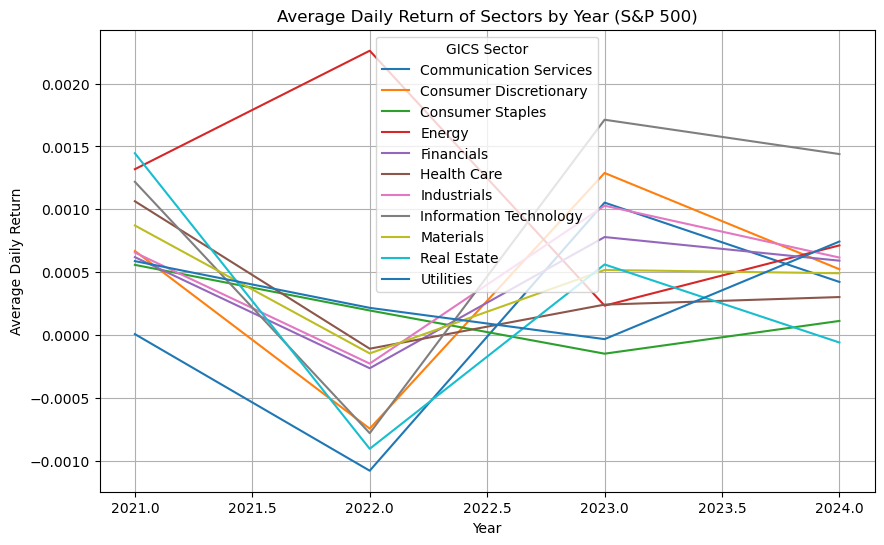

In [84]:
sector_year_avg.T.plot(figsize=(10, 6))
plt.title("Average Daily Return of Sectors by Year (S&P 500)")
plt.ylabel("Average Daily Return")
plt.xlabel("Year")
plt.legend(title="GICS Sector")
plt.grid(True)
plt.show()

## 12. Key Findings & Market Insights (2021–2024)

**1.General Trends and the 2022 Crisis**
2022 was marked by broad declines across nearly all sectors due to recession fears, interest rate hikes, and inflationary pressures (notably in the US market).

Most sectors produced negative returns, with especially sharp drops in Real Estate, Communication Services, Consumer Discretionary, and Industrials.

Energy was a strong positive outlier in 2022, reflecting high returns driven by the surge in energy prices (oil, gas) amid global supply shocks.

Defensive sectors (e.g., Health Care, Consumer Staples, Utilities) displayed greater resilience, either less negative or even slightly positive returns in the crisis year.

**2.Recovery After the Crisis**
2023 marked a broad-based recovery, with most sectors rebounding—particularly Information Technology and Industrials.
These sectors signaled early signs of recovery, while Real Estate and Communication Services lagged, indicating slow normalization post-crisis.

By 2024, most sectors normalized, but the Energy sector continued to provide robust returns, although at a moderated level compared to its crisis-year outperformance.

**3.Sector Profiles: Defensive vs. Aggressive**
Defensive sectors (Health Care, Consumer Staples, Utilities): More stable, lower-volatility returns, especially useful for portfolio protection during downturns.

Aggressive/cyclical sectors (Communication Services, Real Estate, Consumer Discretionary): More volatile and sensitive to macroeconomic cycles, but offer higher upside in bull markets.

**4.Investment Implications**
Portfolio diversification benefits from mixing aggressive and defensive sectors; defensive sectors help cushion losses during downturns, while aggressive sectors drive growth during recovery.

Investors should consider sector rotation strategies based on macroeconomic cycle:

During crisis/uncertainty: Prefer defensive sectors.

During recovery/growth: Lean toward technology, industrials, and consumer sectors for higher return potential.

## 13. Executive Summary: Key Analysis & Findings
**1.Data Quality & Reliability:**
All results are based on a cleaned, robust dataset (494 stocks) with outliers and errors excluded for accuracy.

**2.Returns, Volatility, and Sharpe Ratio:**
Both annual returns and risk-adjusted performance (Sharpe Ratio) were calculated at stock and sector level.

High absolute returns are not always best; high Sharpe ratios (high return per unit of risk) indicate the ideal investment profile.

**3.Sector Comparisons:**

Energy and Information Technology led sector performance during the period.

Defensive sectors outperformed in crisis years; cyclical sectors rebounded more strongly post-crisis.

Weak sectors (Communication Services, Real Estate) showed prolonged underperformance.

**4.Best/Worst Stocks:**

Top stock performers (e.g., LLY, SMCI, NVDA) far exceeded their sector averages.

The worst performers combined high volatility with negative returns—investors should avoid these in risk-averse portfolios.

**5.Inter-sector Correlation:**

Certain sectors (e.g., IT & Communication Services) exhibited strong positive correlation, moving up or down together.

Low-correlation sectors (e.g., Energy & Utilities) enhance diversification, reducing overall portfolio risk.

**6.Index & Alpha Analysis:**

By comparing sector returns with the S&P 500 average, we calculated alpha (excess return).

Energy and IT sectors generated positive alpha, outperforming the market; Communication Services consistently underperformed.

**7.Time Series & Crisis Analysis:**

In crisis years (2022), most sectors delivered negative returns, with defensive sectors showing the most resilience.

In the recovery phase (2023+), risk-seeking sectors rebounded faster, but volatility also increased.

These insights offer investors a valuable roadmap for sector rotation and risk management in response to economic cycles.

The annual sector return trends chart (2021–2024) clearly demonstrates the deep downturn across all sectors in 2022, with a pronounced recovery in 2023—except for laggards like Real Estate and Communication Services. The Energy sector is notable for positive returns even in the crisis year, highlighting its unique role as a hedge in inflationary shocks. Defensive sectors cushioned downside risk, whereas cyclical sectors fueled growth during the rebound.

## Project Owner
**Project Owner & Analyst:**  
**Mert Ovet**  
- Data Analysis, Sector & Risk Modeling  
- [LinkedIn](https://www.linkedin.com/in/mertovet)  

*For questions, feedback, or collaboration requests, feel free to reach out.*

---